# Titanic Dataset Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.impute import SimpleImputer as si

In [2]:
pwd = os.getcwd()
filepath = os.path.join(pwd, 'dataset/train.csv')

In [3]:
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


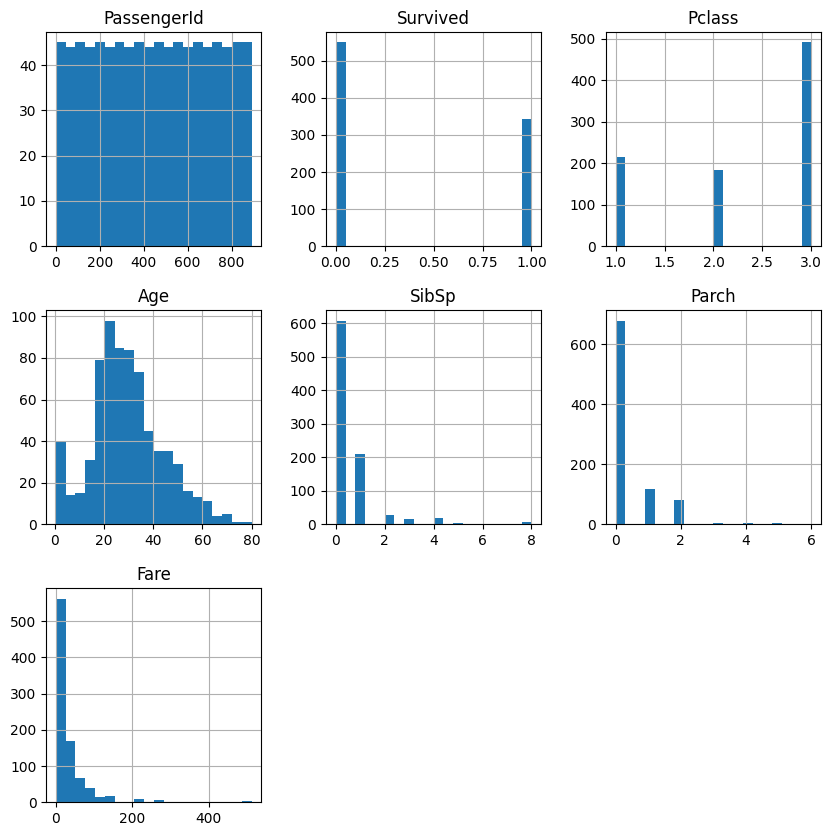

In [6]:
df.hist(bins=20, figsize=(10,10))
plt.show()

<h1>We analyze the Titanic dataset to find:</h1>

+ The ratio of First Class passengers who survived.

+ The percentage of survivors who were female.

In [7]:
first_class_survived = df.loc[df['Pclass']==1]['Survived']
ratio = (first_class_survived==1).sum()/len(first_class_survived)

Total_passengers_survived = df.loc[df['Survived']==1]['Sex']
percentage_of_female_survived = (Total_passengers_survived=='female').sum()/len(Total_passengers_survived)

print("The ratio of passengers who survived from the First Class is: ", ratio, "\nThe ratio of the female survivers is:", percentage_of_female_survived)

The ratio of passengers who survived from the First Class is:  0.6296296296296297 
The ratio of the female survivers is: 0.6812865497076024


In [8]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [9]:
df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
df.dropna(subset=['Embarked'], inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [10]:
imputer = si(strategy="median")
df_num = df.select_dtypes(include=[np.number])
imputer.fit(df_num)
x=imputer.transform(df_num)
df[df_num.columns]=pd.DataFrame(x, columns=df_num.columns, index=df_num.index)

In [11]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S
1,2.0,1.0,1.0,female,38.0,1.0,0.0,71.2833,C
2,3.0,1.0,3.0,female,26.0,0.0,0.0,7.9250,S
3,4.0,1.0,1.0,female,35.0,1.0,0.0,53.1000,S
4,5.0,0.0,3.0,male,35.0,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,male,27.0,0.0,0.0,13.0000,S
887,888.0,1.0,1.0,female,19.0,0.0,0.0,30.0000,S
888,889.0,0.0,3.0,female,28.0,1.0,2.0,23.4500,S
889,890.0,1.0,1.0,male,26.0,0.0,0.0,30.0000,C


In [12]:
imputer.statistics_

array([446.    ,   0.    ,   3.    ,  28.    ,   0.    ,   0.    ,
        14.4542])

In [13]:
df.to_csv('titanic.csv', index=False)